In [9]:
# Загрузка и предварительный просмотр данных из предоставленного CSV-файла
import pandas as pd

# Чтение данных из CSV
file_path = './content/Вводы-data-as-joinbyfield-2024-07-23 12_26_58.csv'
data = pd.read_csv(file_path)

# Просмотр первых нескольких строк данных
data.head()


,Time,Ввод 2 суммарный,Ввод 1 суммарный___
0,2020-06-22 11:00:00,47248,50533
1,2020-06-22 12:00:00,44469,48962
2,2020-06-22 13:00:00,49536,45790
3,2020-06-22 14:00:00,50336,44758
4,2020-06-22 15:00:00,50655,43360


In [10]:
# Преобразование столбца 'Time' в формат datetime
data['Time'] = pd.to_datetime(data['Time'])

# Установим 'Time' в качестве индекса для удобства работы с временными рядами
data.set_index('Time', inplace=True)

# Проверка информации о данных и описательных статистик
data_info = data.info()
data_description = data.describe()

# Проверка временного интервала
time_diff = data.index.to_series().diff().value_counts()

data_info, data_description, time_diff


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23330 entries, 2020-06-22 11:00:00 to 2023-03-20 16:00:00
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Ввод 2 суммарный     23330 non-null  int64
 1   Ввод 1 суммарный___  23330 non-null  int64
dtypes: int64(2)
memory usage: 546.8 KB


(None,
        Ввод 2 суммарный  Ввод 1 суммарный___
 count      23330.000000         23330.000000
 mean       62190.141320         60145.558465
 std        18498.385375         17772.564029
 min        24131.000000         24819.000000
 25%        46629.250000         45299.250000
 50%        61552.000000         58809.500000
 75%        75544.500000         73157.000000
 max       130346.000000        114682.000000,
 Time
 0 days 01:00:00    23290
 0 days 03:00:00       11
 0 days 02:00:00        6
 0 days 04:00:00        4
 0 days 05:00:00        3
 0 days 09:00:00        3
 0 days 06:00:00        2
 0 days 07:00:00        2
 0 days 15:00:00        1
 7 days 14:00:00        1
 6 days 14:00:00        1
 6 days 06:00:00        1
 0 days 08:00:00        1
 0 days 23:00:00        1
 2 days 04:00:00        1
 0 days 22:00:00        1
 Name: count, dtype: int64)

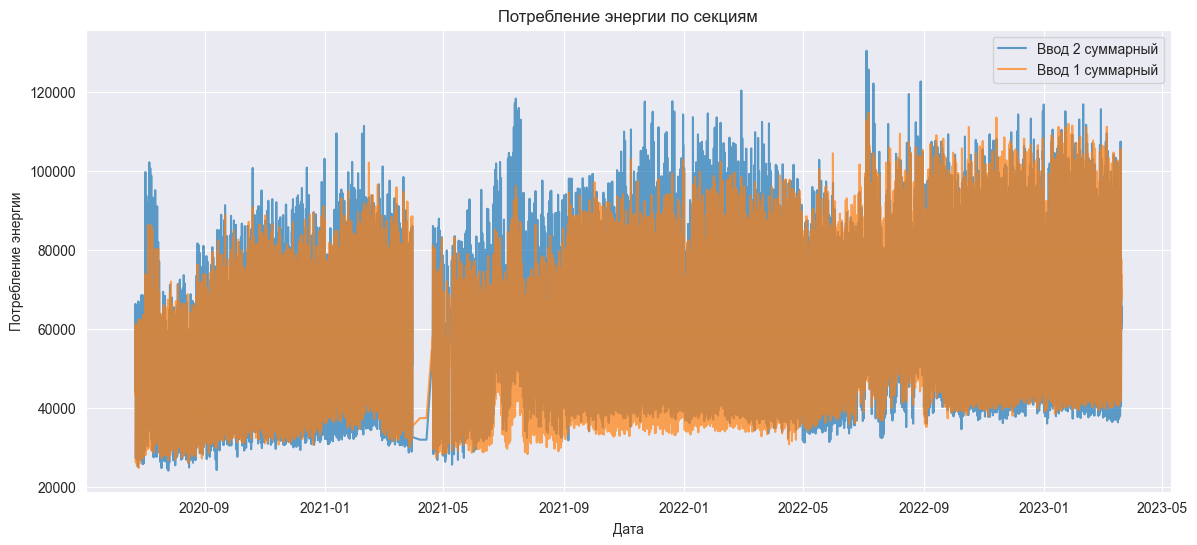

In [11]:
import matplotlib.pyplot as plt

# Визуализация временных рядов для каждой секции
plt.figure(figsize=(14, 6))
plt.plot(data.index, data['Ввод 2 суммарный'], label='Ввод 2 суммарный', alpha=0.7)
plt.plot(data.index, data['Ввод 1 суммарный___'], label='Ввод 1 суммарный', alpha=0.7)
plt.title('Потребление энергии по секциям')
plt.xlabel('Дата')
plt.ylabel('Потребление энергии')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import prophet
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np

# Загрузка данных
file_path = './content/Вводы-data-as-joinbyfield-2024-07-23 12_26_58.csv'
data = pd.read_csv(file_path)

# Преобразование столбца 'Time' в формат datetime и установка индекса
data['Time'] = pd.to_datetime(data['Time'])
data.set_index('Time', inplace=True)

# Разделение данных на обучающую и тестовую выборки
train_end = -24  # Используем последние 24 часа для тестирования
train_data = data['Ввод 2 суммарный'][:train_end]
test_data = data['Ввод 2 суммарный'][train_end:]


# Обучение модели SARIMA
sarima_model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))
sarima_fit = sarima_model.fit(disp=False)

# Прогнозирование на 24 часа
forecast_24 = sarima_fit.forecast(steps=24)

# Оценка модели с использованием RMSE
rmse = np.sqrt(mean_squared_error(test_data, forecast_24))
print(f"RMSE: {rmse}")

# Построение графика прогноза
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Фактические данные')
plt.plot(test_data.index, forecast_24, label='Прогноз SARIMA', linestyle='--')
plt.title('Прогноз потребления для Ввод 2 суммарный')
plt.xlabel('Дата')
plt.ylabel('Потребление энергии')
plt.legend()
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
